## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Loading the dataset

In [3]:
df=pd.read_csv(r'D:\sumit_DS project\Datasets with source_code\ML\Regression\Salary_slr\Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df2 = df.copy()
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
y = df2.drop("YearsExperience", axis = "columns")
X= df2.drop("Salary", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (30, 1)
shape of y =  (30, 1)


In [7]:
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [8]:
print(y)

      Salary
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
5    56642.0
6    60150.0
7    54445.0
8    64445.0
9    57189.0
10   63218.0
11   55794.0
12   56957.0
13   57081.0
14   61111.0
15   67938.0
16   66029.0
17   83088.0
18   81363.0
19   93940.0
20   91738.0
21   98273.0
22  101302.0
23  113812.0
24  109431.0
25  105582.0
26  116969.0
27  112635.0
28  122391.0
29  121872.0


In [9]:
#SPLITING THE DATASET IN TRAINING SET & TESTING SET
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (24, 1)
shape of y_train =  (24, 1)
shape of X_test =  (6, 1)
shape of y_test =  (6, 1)


In [10]:
y_test

,Salary
24,109431.0
8,64445.0
2,37731.0
23,113812.0
7,54445.0
27,112635.0


In [11]:
y_train

,Salary
15,67938.0
18,81363.0
1,46205.0
19,93940.0
13,57081.0
17,83088.0
10,63218.0
12,56957.0
6,60150.0
11,55794.0


In [12]:
# We will import LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression

#Lets create regressor object for LinearRegression class
slr=LinearRegression()

#fit the regressor object to our training set
#by using regressor.fit machine able to learn training data using SLR model 

slr.fit(X_train,y_train)

LinearRegression()

In [13]:
#lets create an object of predicted value (y_pred) contain only predicted salary for all observation of our test set
#this predict will use the prediction of aslary
y_pred=slr.predict(X_test)
y_pred

array([[107193.59760834],
       [ 55668.48562384],
       [ 39742.54191954],
       [102509.49651884],
       [ 55668.48562384],
       [115624.97956944]])

In [15]:
#Fitting the logistic regression model
slr.predict([[8.5]]).round(2)

array([[105319.96]])

In [43]:
#creaating the dataframe with new features "Experience","salary_original", "salary_predicted"
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["Experience","salary_original", "salary_predicted"])

,Experience,salary_original,salary_predicted
0,8.7,109431.0,107193.597608
1,3.2,64445.0,55668.485624
2,1.5,37731.0,39742.541920
3,8.2,113812.0,102509.496519
4,3.2,54445.0,55668.485624
5,9.6,112635.0,115624.979569


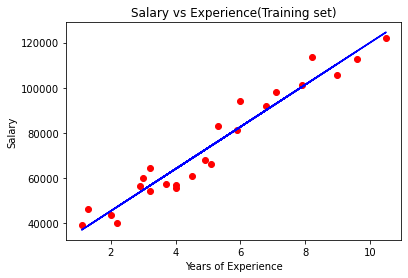

In [26]:
#VISUALISING THE TRAINING SET RESULTS

plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,regressor.predict(x_train),color="blue")
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

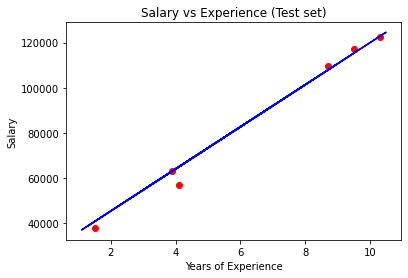

In [27]:
#VISUALISING THE TEST SET RESULTS

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [16]:
#getting the coefficient
slr.coef_

array([[9368.202179]])

In [17]:
#getting the intercept
slr.intercept_

array([25690.23865104])

In [18]:
# getting the score
slr.score(X_test,y_test)

0.9608624689052039

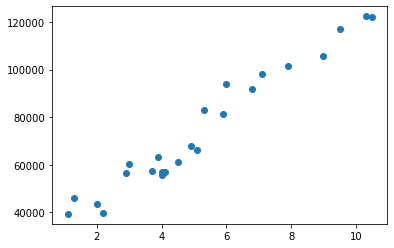

In [19]:
# Scatter plot 
plt.scatter(X_train,y_train)

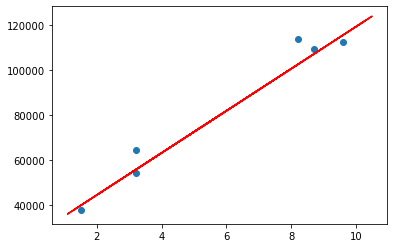

In [21]:
#Getting the regression line
plt.scatter(X_test, y_test)
plt.plot(X_train, slr.predict(X_train), color = "r")

## Save Ml Model

In [22]:
# Generataing the pickle file
import joblib
joblib.dump(slr, "salary_predictor.pkl")

['salary_predictor.pkl']

In [23]:
# saving the pickle file
mymodel = joblib.load("salary_predictor.pkl")